In [1]:
import matplotlib.pyplot as plt
import numpy as np
import sys
sys.path.append('..')
import ugent
import scipy.special as sps

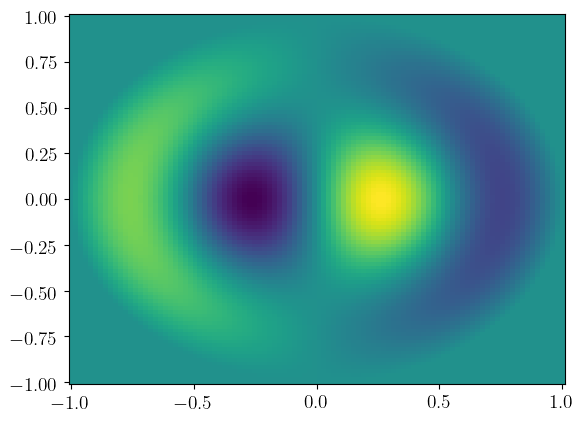

In [36]:
x = np.linspace(0, 1)

def eigenfunction(i, j):
    z = sps.jn_zeros(i, j+1)[j]
    def f(x, y):
        theta = np.arctan2(y, x)
        rho = np.hypot(x, y)
        return np.cos(i * theta) * sps.jv(i, rho*z)
    return f

f = eigenfunction(1, 1)

x = np.linspace(-1, 1, 100)
X, Y = np.meshgrid(x, x)
Z = f(X, Y)
Z[np.where(X**2 + Y**2 > 1)] = 0

vmax = np.max(np.abs(Z))

plt.pcolormesh(X, Y, Z, vmin=-vmax, vmax=vmax)

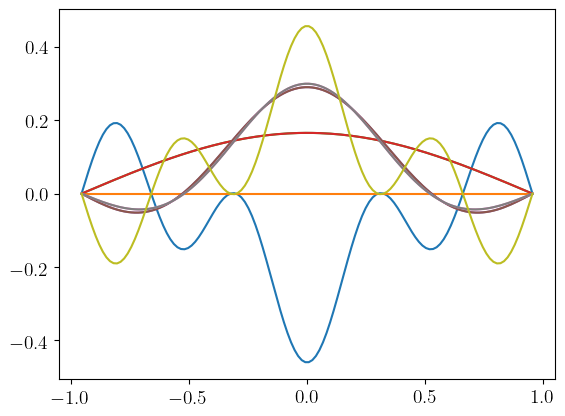

In [152]:
y = .3
a = np.sqrt(1-y*y)

f = eigenfunction(2, 2)

xs = np.linspace(-a, a, 128)
data = f(xs, np.ones(xs.shape) * y)

fft = np.fft.rfft(np.hstack([-data[::-1], data[1:-1]]))
n = len(data)

plt.plot(xs, data)
r = np.zeros(xs.shape)
for i in range(0, 8):
    r -= 1/n * np.imag(fft[i]) * np.sin((xs + a)/(2*a) * np.pi * i)
    plt.plot(xs, r)

In [131]:
fft

array([-2.29567571e+01+0.00000000e+00j, -1.90819582e-16-4.96022494e-18j,
        1.08154019e+01+0.00000000e+00j, -1.11976400e-15-8.37004077e-17j,
       -1.24236460e+01+0.00000000e+00j,  2.68188249e-15+1.44198889e-17j,
        5.74348453e+00-1.66533454e-16j, -2.22044605e-16-4.22838847e-17j,
        2.02170173e+00+5.55111512e-17j, -2.34187669e-15+1.62630326e-17j,
        1.10835380e+00+2.77555756e-17j,  1.57339419e-15+8.02309608e-18j,
        7.15768221e-01+0.00000000e+00j, -9.63638891e-16+8.67361738e-19j,
        5.05445685e-01+0.00000000e+00j,  1.43374895e-15-3.03576608e-17j,
        3.78062356e-01+1.24900090e-16j,  6.97358837e-16-1.73472348e-18j,
        2.94515459e-01+6.93889390e-17j, -1.54650598e-15+4.77048956e-17j,
        2.36535771e-01-2.08166817e-17j,  1.77895892e-15+1.29236899e-16j,
        1.94556035e-01+1.38777878e-17j, -4.33680869e-17-8.54351312e-17j,
        1.63136289e-01-9.02056208e-17j, -1.09981468e-15+6.89552582e-17j,
        1.38983689e-01+7.63278329e-17j,  2.17794532